In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=2, color='k', alpha=1)
whiskerprops=dict(linestyle='-', linewidth=0)


<ipython-input-1-e1e476268f6b>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [56]:
exp_names = ["svhn",
            "cifar10",
            "cifar100",
            "super_cifar100",
            "camelyon",
            "animals",
             "breeds",
            ]

df_list = []
for exp in exp_names:
    in_path = os.path.join("/Users/Paul/research/files/analysis/csvs/{}_paper_sweep.csv".format(exp))
    df =  pd.read_csv(in_path)
    df = df.dropna(subset=["name", "model"])
    df = df.drop_duplicates(subset=["name", "study", "model", "network", "confid"])
    df = df[(~df.study.str.contains("tinyimagenet_original")) & (~df.study.str.contains("tinyimagenet_proposed"))]
    if exp == "cifar10" or exp == "cifar100" or exp == "super_cifar100":
        df = df[(df.name.str.contains("vgg13"))]
    if exp == "super_cifar100":
        df = df[df.study == "iid_study"]
        df["study"] = df.apply(lambda row: "cifar100_in_class_study_superclasses", axis=1)
    else:
        df["study"] = df.apply(lambda row: exp + "_" + row["study"], axis=1)
    print(exp, len(df.groupby("name").count()))

    df_list.append(df)

df = pd.concat(df_list)
exp_names = [e for e in exp_names if e !="super_cifar100"]

svhn 55
cifar10 65
cifar100 85
super_cifar100 85
camelyon 110
animals 55
breeds 18


In [57]:
df.groupby("study").count()

Unnamed: 0  name  \
study                                                                          
animals_iid_study                                           325         325    
animals_in_class_study_wilds_animals_ood_test               325         325    
animals_val_tuning                                          325         325    
breeds_iid_study                                            118         118    
breeds_in_class_study_breeds_ood_test                       118         118    
breeds_val_tuning                                           118         118    
camelyon_iid_study                                          730         730    
camelyon_in_class_study_wilds_camelyon_ood_test             730         730    
camelyon_val_tuning                                         730         730    
cifar100_iid_study                                          575         575    
cifar100_in_class_study_superclasses                        575         575    
cifar100_new_class_study_cifar10_original_mode              575         575    
cifar100_new_class_study_cifar10_proposed_mode              575         575    
cifar100_new_class_study_svhn_original_mode                 575         575    
cifar100_new_class_study_svhn_proposed_mode                 575         575    
cifar100_new_class_study_tinyimagenet_resize_original_mode  575         575    
cifar100_new_class_study_tinyimagenet_resize_proposed_mode  575         575    
cifar100_noise_study_1                                      575         575    
cifar100_noise_study_2                                      575         575    
cifar100_noise_study_3                                      575         575    
cifar100_noise_study_4                                      575         575    
cifar100_noise_study_5                                      575         575    
cifar100_val_tuning                                         575         575    
cifar10_iid_study                                           435         435    
cifar10_new_class_study_cifar100_original_mode              435         435    
cifar10_new_class_study_cifar100_proposed_mode              435         435    
cifar10_new_class_study_svhn_original_mode                  435         435    
cifar10_new_class_study_svhn_proposed_mode                  435         435    
cifar10_new_class_study_tinyimagenet_resize_original_mode   435         435    
cifar10_new_class_study_tinyimagenet_resize_proposed_mode   435         435    
cifar10_noise_study_1                                       435         435    
cifar10_noise_study_2                                       435         435    
cifar10_noise_study_3                                       435         435    
cifar10_noise_study_4                                       435         435    
cifar10_noise_study_5                                       435         435    
cifar10_val_tuning                                          435         435    
svhn_iid_study                                              365         365    
svhn_new_class_study_cifar100_original_mode                 365         365    
svhn_new_class_study_cifar100_proposed_mode                 365         365    
svhn_new_class_study_cifar10_original_mode                  365         365    
svhn_new_class_study_cifar10_proposed_mode                  365         365    
svhn_new_class_study_tinyimagenet_resize_original_mode      365         365    
svhn_new_class_study_tinyimagenet_resize_proposed_mode      365         365    
svhn_val_tuning                                             365         365    

                                                            model  network  \
study                                                                        
animals_iid_study                                           325    85        
animals_in_class_study_wilds_animals_ood_test               325    85        
animals_val_tuning                                          325    

In [58]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0], axis=1)
df["rew"] = df.apply(lambda row: row["name"].split("_rew")[1].split("_")[0], axis=1)
df["confid"] = df.apply(lambda row: row["model"] + "_" + row["confid"] + "_" + row["dropout"] + "_" + row["rew"], axis=1)
df = df.drop("model", axis=1)
df = df.drop("dropout", axis=1)


df = df.drop("backbone", axis=1)
print(len(df))

20144


In [59]:
df.groupby("study").count()

Unnamed: 0  name  \
study                                                                          
animals_iid_study                                           325         325    
animals_in_class_study_wilds_animals_ood_test               325         325    
animals_val_tuning                                          325         325    
breeds_iid_study                                            118         118    
breeds_in_class_study_breeds_ood_test                       118         118    
breeds_val_tuning                                           118         118    
camelyon_iid_study                                          730         730    
camelyon_in_class_study_wilds_camelyon_ood_test             730         730    
camelyon_val_tuning                                         730         730    
cifar100_iid_study                                          575         575    
cifar100_in_class_study_superclasses                        575         575    
cifar100_new_class_study_cifar10_original_mode              575         575    
cifar100_new_class_study_cifar10_proposed_mode              575         575    
cifar100_new_class_study_svhn_original_mode                 575         575    
cifar100_new_class_study_svhn_proposed_mode                 575         575    
cifar100_new_class_study_tinyimagenet_resize_original_mode  575         575    
cifar100_new_class_study_tinyimagenet_resize_proposed_mode  575         575    
cifar100_noise_study_1                                      575         575    
cifar100_noise_study_2                                      575         575    
cifar100_noise_study_3                                      575         575    
cifar100_noise_study_4                                      575         575    
cifar100_noise_study_5                                      575         575    
cifar100_val_tuning                                         575         575    
cifar10_iid_study                                           435         435    
cifar10_new_class_study_cifar100_original_mode              435         435    
cifar10_new_class_study_cifar100_proposed_mode              435         435    
cifar10_new_class_study_svhn_original_mode                  435         435    
cifar10_new_class_study_svhn_proposed_mode                  435         435    
cifar10_new_class_study_tinyimagenet_resize_original_mode   435         435    
cifar10_new_class_study_tinyimagenet_resize_proposed_mode   435         435    
cifar10_noise_study_1                                       435         435    
cifar10_noise_study_2                                       435         435    
cifar10_noise_study_3                                       435         435    
cifar10_noise_study_4                                       435         435    
cifar10_noise_study_5                                       435         435    
cifar10_val_tuning                                          435         435    
svhn_iid_study                                              365         365    
svhn_new_class_study_cifar100_original_mode                 365         365    
svhn_new_class_study_cifar100_proposed_mode                 365         365    
svhn_new_class_study_cifar10_original_mode                  365         365    
svhn_new_class_study_cifar10_proposed_mode                  365         365    
svhn_new_class_study_tinyimagenet_resize_original_mode      365         365    
svhn_new_class_study_tinyimagenet_resize_proposed_mode      365         365    
svhn_val_tuning                                             365         365    

                                                            network  fold  \
study                                                                       
animals_iid_study                                           85       325    
animals_in_class_study_wilds_animals_ood_test               85       325    
animals_val_tuning                                          85       32

In [31]:
# MODEL SELECTION

def select_func(row, selection_df, selection_column):
    name_splitter = -1 if selection_column == "rew" else -2
    row_exp = row["study"].split("_")[0] + "_"
    row_confid = "_".join(row["confid"].split("_")[:name_splitter])
    selection_df = selection_df[(selection_df.study.str.contains(row_exp)) & (selection_df.confid == row_confid)]
    try:
        if row[selection_column] == selection_df[selection_column].tolist()[0]:
            return 1
        else:
            return 0
    except:
        assert 1==2
        #print(row_exp, row_confid, len(selection_df))

ms_metric = "aurc"

# REWARD
non_agg_columns = ["study", "confid", "rew"]
ms_filter_metrics_df = df[["study", "confid", "run", "rew", ms_metric]]
df_ms = ms_filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index()
print(len(df_ms), len(ms_filter_metrics_df))
df_ms = df_ms[df_ms.study.str.contains("val_tuning")]
df_ms["confid"] = df_ms.apply(lambda row: "_".join(row["confid"].split("_")[:-1]), axis=1)
df_ms = df_ms.loc[df_ms.groupby(['study', 'confid'])[ms_metric].idxmin().reset_index()[ms_metric]]
print(len(df), len(df_ms))
df["select_rew"] = df.apply(lambda row: select_func(row, df_ms, "rew"), axis=1)
selected_df = df[df.select_rew == 1]

# DROPOUT
non_agg_columns = ["study", "confid", "dropout"]
selected_df["dropout"] = selected_df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
do_filter_metrics_df = selected_df[["study", "confid", "run", "dropout", ms_metric]]
df_do = do_filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index()
print(len(df_do), len(do_filter_metrics_df))
df_do = df_do[df_do.study.str.contains("val_tuning")]
df_do["confid"] = df_do.apply(lambda row: "_".join(row["confid"].split("_")[:-2]), axis=1)
df_do = df_do.loc[df_do.groupby(['study', 'confid'])[ms_metric].idxmin().reset_index()[ms_metric]]
print(len(df), len(selected_df), len(df_do))
selected_df["select_do"] = selected_df.apply(lambda row: select_func(row, df_do, "dropout"), axis=1)
all_selected_df = selected_df[selected_df.select_do == 1]

4466 22894
22894 186
1550 7936
22894 7936 150


<ipython-input-31-785aa3ec764b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["dropout"] = selected_df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
<ipython-input-31-785aa3ec764b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["select_do"] = selected_df.apply(lambda row: select_func(row, df_do, "dropout"), axis=1)


In [55]:
pd.set_option('display.max_rows', 200)
print(len(df), len(selected_df))
all_selected_df[(all_selected_df.study.str.contains("val_tuning")) & (all_selected_df.run == "1") & (~all_selected_df.confid.str.contains("mcd"))][["study", "confid", "rew", "dropout", "aurc"]]

5376 7936


study                    confid  rew dropout       aurc
0      svhn_val_tuning      devries_det_mcp_0_2.2     2.2  0       6.16547  
1      svhn_val_tuning      devries_det_pe_0_2.2      2.2  0       6.04104  
2      svhn_val_tuning      devries_devries_0_2.2     2.2  0       13.25337 
185    svhn_val_tuning      dg_dg_1_2.2               2.2  1       4.12535  
187    svhn_val_tuning      dg_dg_waic_1_2.2          2.2  1       4.63840  
238    svhn_val_tuning      dg_det_mcp_1_3            3    1       4.21393  
239    svhn_val_tuning      dg_det_pe_1_3             3    1       3.47433  
3417   svhn_val_tuning      confidnet_det_mcp_1_2.2   2.2  1       4.60822  
3418   svhn_val_tuning      confidnet_det_pe_1_2.2    2.2  1       3.55896  
3419   svhn_val_tuning      confidnet_tcp_1_2.2       2.2  1       3.48524  
3421   svhn_val_tuning      confidnet_tcp_waic_1_2.2  2.2  1       3.50349  
0      cifar10_val_tuning   devries_det_mcp_0_2.2     2.2  0       5.55643  
1      cifar10_val_tuning   devries_det_pe_0_2.2      2.2  0       5.04090  
2      cifar10_val_tuning   devries_devries_0_2.2     2.2  0       4.36526  
456    cifar10_val_tuning   dg_det_mcp_0_6            6    0       3.27467  
457    cifar10_val_tuning   dg_det_pe_0_6             6    0       3.34783  
461    cifar10_val_tuning   dg_dg_0_2.2               2.2  0       4.67663  
1643   cifar10_val_tuning   dg_dg_waic_1_2.2          2.2  1       6.10491  
2421   cifar10_val_tuning   confidnet_det_mcp_1_2.2   2.2  1       5.41121  
2422   cifar10_val_tuning   confidnet_det_pe_1_2.2    2.2  1       5.25415  
2423   cifar10_val_tuning   confidnet_tcp_1_2.2       2.2  1       4.85647  
2425   cifar10_val_tuning   confidnet_tcp_waic_1_2.2  2.2  1       5.30801  
7      cifar100_val_tuning  dg_det_pe_0_10            10   0       59.84882 
489    cifar100_val_tuning  devries_det_mcp_0_2.2     2.2  0       68.98538 
490    cifar100_val_tuning  devries_det_pe_0_2.2      2.2  0       69.19265 
491    cifar100_val_tuning  devries_devries_0_2.2     2.2  0       87.33003 
1371   cifar100_val_tuning  confidnet_det_mcp_0_2.2   2.2  0       65.49685 
6494   cifar100_val_tuning  confidnet_det_pe_1_2.2    2.2  1       72.11836 
6495   cifar100_val_tuning  confidnet_tcp_1_2.2       2.2  1       69.23742 
6497   cifar100_val_tuning  confidnet_tcp_waic_1_2.2  2.2  1       70.82329 
10993  cifar100_val_tuning  dg_det_mcp_0_12           12   0       64.30431 
10995  cifar100_val_tuning  dg_dg_0_12                12   0       81.43567 
15909  cifar100_val_tuning  dg_dg_waic_1_20           20   1       94.15551 
105    camelyon_val_tuning  dg_det_mcp_0_2.2          2.2  0       2.32680  
106    camelyon_val_tuning  dg_det_pe_0_2.2           2.2  0       2.32470  
107    camelyon_val_tuning  dg_dg_0_2.2               2.2  0       2.36608  
210    camelyon_val_tuning  devries_det_mcp_0_2.2     2.2  0       3.58428  
211    camelyon_val_tuning  devries_det_pe_0_2.2      2.2  0       3.54658  
212    camelyon_val_tuning  devries_devries_0_2.2     2.2  0       3.34071  
670    camelyon_val_tuning  dg_dg_waic_1_10           10   1       1.69448  
1062   camelyon_val_tuning  confidnet_det_mcp_1_2.2   2.2  1       8.28447  
1063   camelyon_val_tuning  confidnet_det_pe_1_2.2    2.2  1       8.25652  
1064   camelyon_val_tuning  confidnet_tcp_1_2.2       2.2  1       4.13467  
1066   camelyon_val_tuning  confidnet_tcp_waic_1_2.2  2.2  1       4.30856  
0      animals_val_tuning   devries_det_mcp_0_2.2     2.2  0       78.31468 
1      animals_val_tuning   devries_det_pe_0_2.2      2.2  0       77.37194 
2      animals_val_tuning   devries_devries_0_2.2     2.2  0       210.75533
117    animals_val_tuning   confidnet_det_mcp_0_2.2   2.2  0       61.38593 
118    animals_val_tuning   confidnet_det_pe_0_2.2    2.2  0       59.73573 
208    animals_val_tuning   dg_det_pe_0_6             6    0       73.08120 
209    animals_val_tuning   dg_dg_0_6                 6    0       112.92337
504    animals_va

In [53]:
def rename_confids(in_confid):
    confid = in_confid.replace("confidnet_", "")
    confid = confid.replace("_dg", "resevation")
    confid = confid.replace("dg_", "deepgamblers_")
    confid = confid.replace("_det", "")
    confid = confid.replace("det_", "")
    confid = confid.replace("_devries", "")
    confid = confid.replace("tcp", "confidnet")
    return confid

# FINAL CLEANING AND ASSIGNING OF DF
clean_df = all_selected_df.drop("dropout", axis=1)
clean_df = clean_df.drop("rew", axis=1)
clean_df = clean_df[~clean_df.confid.str.contains("waic")]
clean_df["confid"] = clean_df.apply(lambda row: "_".join(row["confid"].split("_")[:-2]), axis=1)
clean_df["confid"] = clean_df.apply(lambda row: rename_confids(row["confid"]), axis=1)
df = clean_df
print(df.columns)

Index(['Unnamed: 0', 'name', 'study', 'network', 'fold', 'confid', 'n_test',
       'accuracy', 'nll', 'brier_score', 'failauc', 'failap_suc', 'failap_err',
       'mce', 'ece', 'e-aurc', 'aurc', 'fpr@95tpr', 'risk@100cov',
       'risk@95cov', 'risk@90cov', 'risk@85cov', 'risk@80cov', 'risk@75cov',
       'test_risk', 'test_cov', 'diff_risk', 'diff_cov', 'rstar', 'val_theta',
       'run', 'select_rew', 'select_do'],
      dtype='object')


In [44]:
# NUMBER TABLES. TODO GET RID OF REWARD FOR PROPER RANKING ACROSS STUDIES!

metric = "aurc"
non_agg_columns = ["study", "confid"] # might need rew if no model selection
filter_metrics_df = df[non_agg_columns + ["run", metric]]
df_mean = filter_metrics_df.groupby(by=non_agg_columns).mean().reset_index().round(3)
df_std = filter_metrics_df.groupby(by=non_agg_columns).std().reset_index().round(3)

studies = df_mean.study.unique().tolist()
dff = df_mean[df_mean.study=="cifar100_iid_study"][["confid"]]
print("CHECK LEN DFF", len(dff), len(df_mean))
combine_and_str = False
if combine_and_str:
    agg_mean_std = lambda s1, s2: s1  if (s1.name == "confid" or s1.name == "study" or s1.name=="rew") else s1.astype(str) + " ± " + s2.astype(str)
    df_mean = df_mean.combine(df_std, agg_mean_std)
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])


else:
    for s in studies:
        sdf = df_mean[df_mean.study == s]
        dff[s] = dff["confid"].map(sdf.set_index("confid")[metric])
        # print("DFF", dff.columns.tolist())


CHECK LEN DFF 21 1050


In [45]:
# PLOT METRICS SELECTION

dff[["confid"] + [c for c in dff.columns if "original" in c]]

confid  \
189  confidnet                       
190  confidnet_mcd                   
191  deepgamblers                    
192  deepgamblers_deepgamblers_mcd   
193  deepgamblers_mcd_ee             
194  deepgamblers_mcd_mcp            
195  deepgamblers_mcd_mi             
196  deepgamblers_mcd_pe             
197  deepgamblers_mcd_sv             
198  deepgamblers_mcp                
199  deepgamblers_pe                 
200  det_mcp                         
201  det_pe                          
202  devries                         
203  devries_mcp                     
204  devries_pe                      
205  mcd_ee                          
206  mcd_mcp                         
207  mcd_mi                          
208  mcd_pe                          
209  mcd_sv                          

     cifar100_new_class_study_cifar10_original_mode  \
189  305.682                                          
190  302.623                                          
191  302.553                                          
192  306.280                                          
193  297.465                                          
194  295.634                                          
195  295.379                                          
196  294.664                                          
197  297.165                                          
198  300.917                                          
199  295.644                                          
200  298.093                                          
201  300.900                                          
202  314.351                                          
203  300.136                                          
204  292.804                                          
205  294.017                                          
206  295.516                                          
207  292.393                                          
208  291.806                                          
209  291.247                                          

     cifar100_new_class_study_svhn_original_mode  \
189  530.849                                       
190  502.501                                       
191  481.424                                       
192  481.500                                       
193  525.398                                       
194  518.904                                       
195  505.755                                       
196  517.581                                       
197  510.003                                       
198  509.712                                       
199  489.279                                       
200  509.355                                       
201  567.373                                       
202  535.020                                       
203  529.304                                       
204  523.892                                       
205  518.593                                       
206  525.161                                       
207  502.671                                       
208  513.247                                       
209  505.706                                       

     cifar100_new_class_study_tinyimagenet_original_mode  \
189  259.568                                               
190  277.845                                               
191  256.199                                               
192  246.525                                               
193  285.515                                               
194  284.857                                               
195  282.683                                               
196  282.738                                               
197  287.192                                               
198  278.156                                               
199  264.896                                               
200  292.121                                               
201  263.854                                           

In [46]:

# RANKING DF

# dff = dff[["confid", "rew"] + [c for c in dff.columns if  c.startswith("cifar100")]]
select_df = dff
rank_df = select_df.rank(na_option="keep", numeric_only=True, ascending=False)
# actually aurc should be ranked ascedingly, but we want the lowest rank to show on top on the y axis
# so careful when using this df for other things than this plot!

rank_df["confid"] = dff.confid

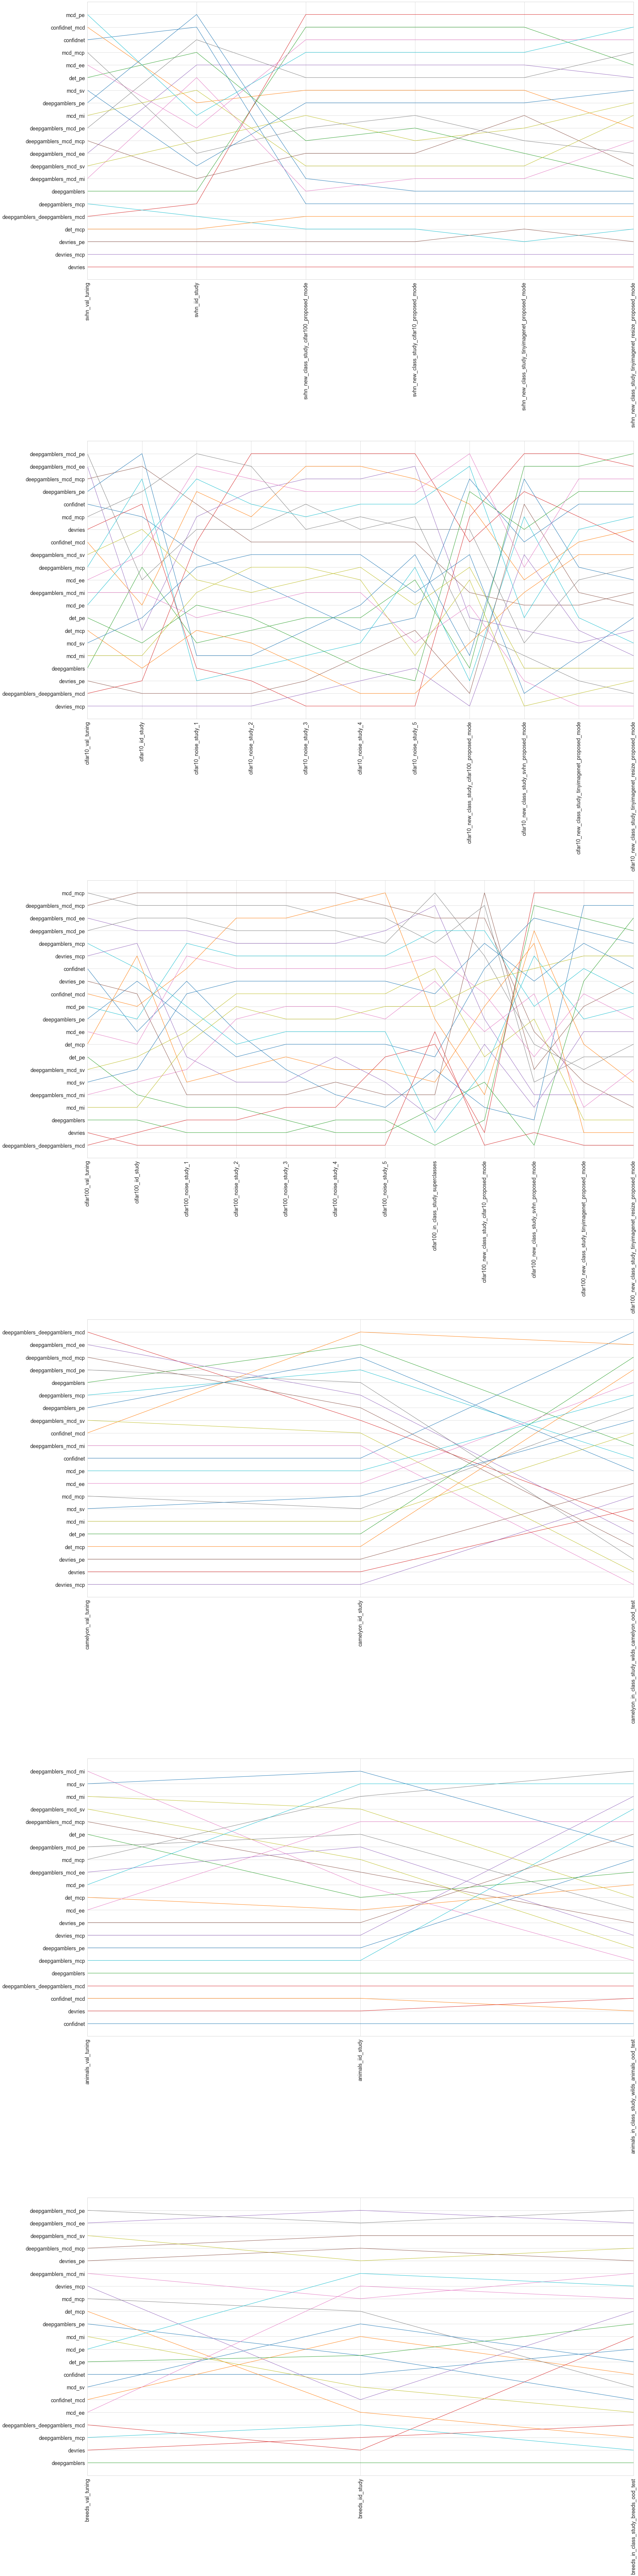

In [47]:
# RANKING PLOTS

scale = 10
sns.set_style("whitegrid")
plt_exps = exp_names
sns.set_context("paper", font_scale=scale * 0.20)
f, axs = plt.subplots(nrows=len(plt_exps), ncols=1, figsize=(3*scale, len(exp_names)*scale * 2))
# todo ! supercifar has to be a part of cifar100 exp. check also weird observation regarding val_tuning
for ax_ix, exp in enumerate(plt_exps):
        cols = [c for c in rank_df.columns if c.startswith(exp + "_")]
        cols = ["{}_val_tuning".format(exp), "{}_iid_study".format(exp)] + [c for c in cols if "noise" in c] + [c for c in cols if "in_class" in c] + [c for c in cols if "proposed" in c]
        numeric_exp_df = rank_df[cols]
        # todo DROPNAN?
        confids_list = rank_df.confid.tolist()
        x = range(len(numeric_exp_df.columns))
        for ix in range(len(numeric_exp_df)):
            y = numeric_exp_df.iloc[ix].values
            axs[ax_ix].plot(x, y)
        axs[ax_ix].set_yticks(range(1, len(numeric_exp_df) + 1))
        axs[ax_ix].set_yticklabels(rank_df[["confid"] + [c for c in rank_df.columns if c.startswith(exp)]].sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
        axs[ax_ix].set_xticks(x)
        axs[ax_ix].set_xticklabels([c for c in numeric_exp_df.columns], rotation = 90)
        axs[ax_ix].set_xlim(0, len(numeric_exp_df.columns) - 1)

plt.tight_layout()
plt.show()

IID ['animals_iid_study', 'breeds_iid_study', 'camelyon_iid_study', 'cifar100_iid_study', 'cifar10_iid_study', 'svhn_iid_study']
SUB CLASS ['animals_in_class_study_wilds_animals_ood_test', 'breeds_in_class_study_breeds_ood_test', 'camelyon_in_class_study_wilds_camelyon_ood_test', 'cifar100_in_class_study_superclasses']
SEMANTIC NEW CLASS ['cifar100_new_class_study_cifar10_proposed_mode', 'cifar10_new_class_study_cifar100_proposed_mode']
NON-SEMANTIC NEW CLASS ['cifar100_new_class_study_svhn_proposed_mode', 'cifar100_new_class_study_tinyimagenet_proposed_mode', 'cifar100_new_class_study_tinyimagenet_resize_proposed_mode', 'cifar10_new_class_study_svhn_proposed_mode', 'cifar10_new_class_study_tinyimagenet_proposed_mode', 'cifar10_new_class_study_tinyimagenet_resize_proposed_mode', 'svhn_new_class_study_cifar100_proposed_mode', 'svhn_new_class_study_cifar10_proposed_mode', 'svhn_new_class_study_tinyimagenet_proposed_mode', 'svhn_new_class_study_tinyimagenet_resize_proposed_mode']
NOISE ['

<ipython-input-67-bf7803792e6b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_rank_df["iid"] = rank_df[iid_columns].sum(axis=1, numeric_only=True, skipna=False)
<ipython-input-67-bf7803792e6b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_rank_df["noise_shift"] = rank_df[noise_columns].sum(axis=1, numeric_only=True, skipna=False)
<ipython-input-67-bf7803792e6b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

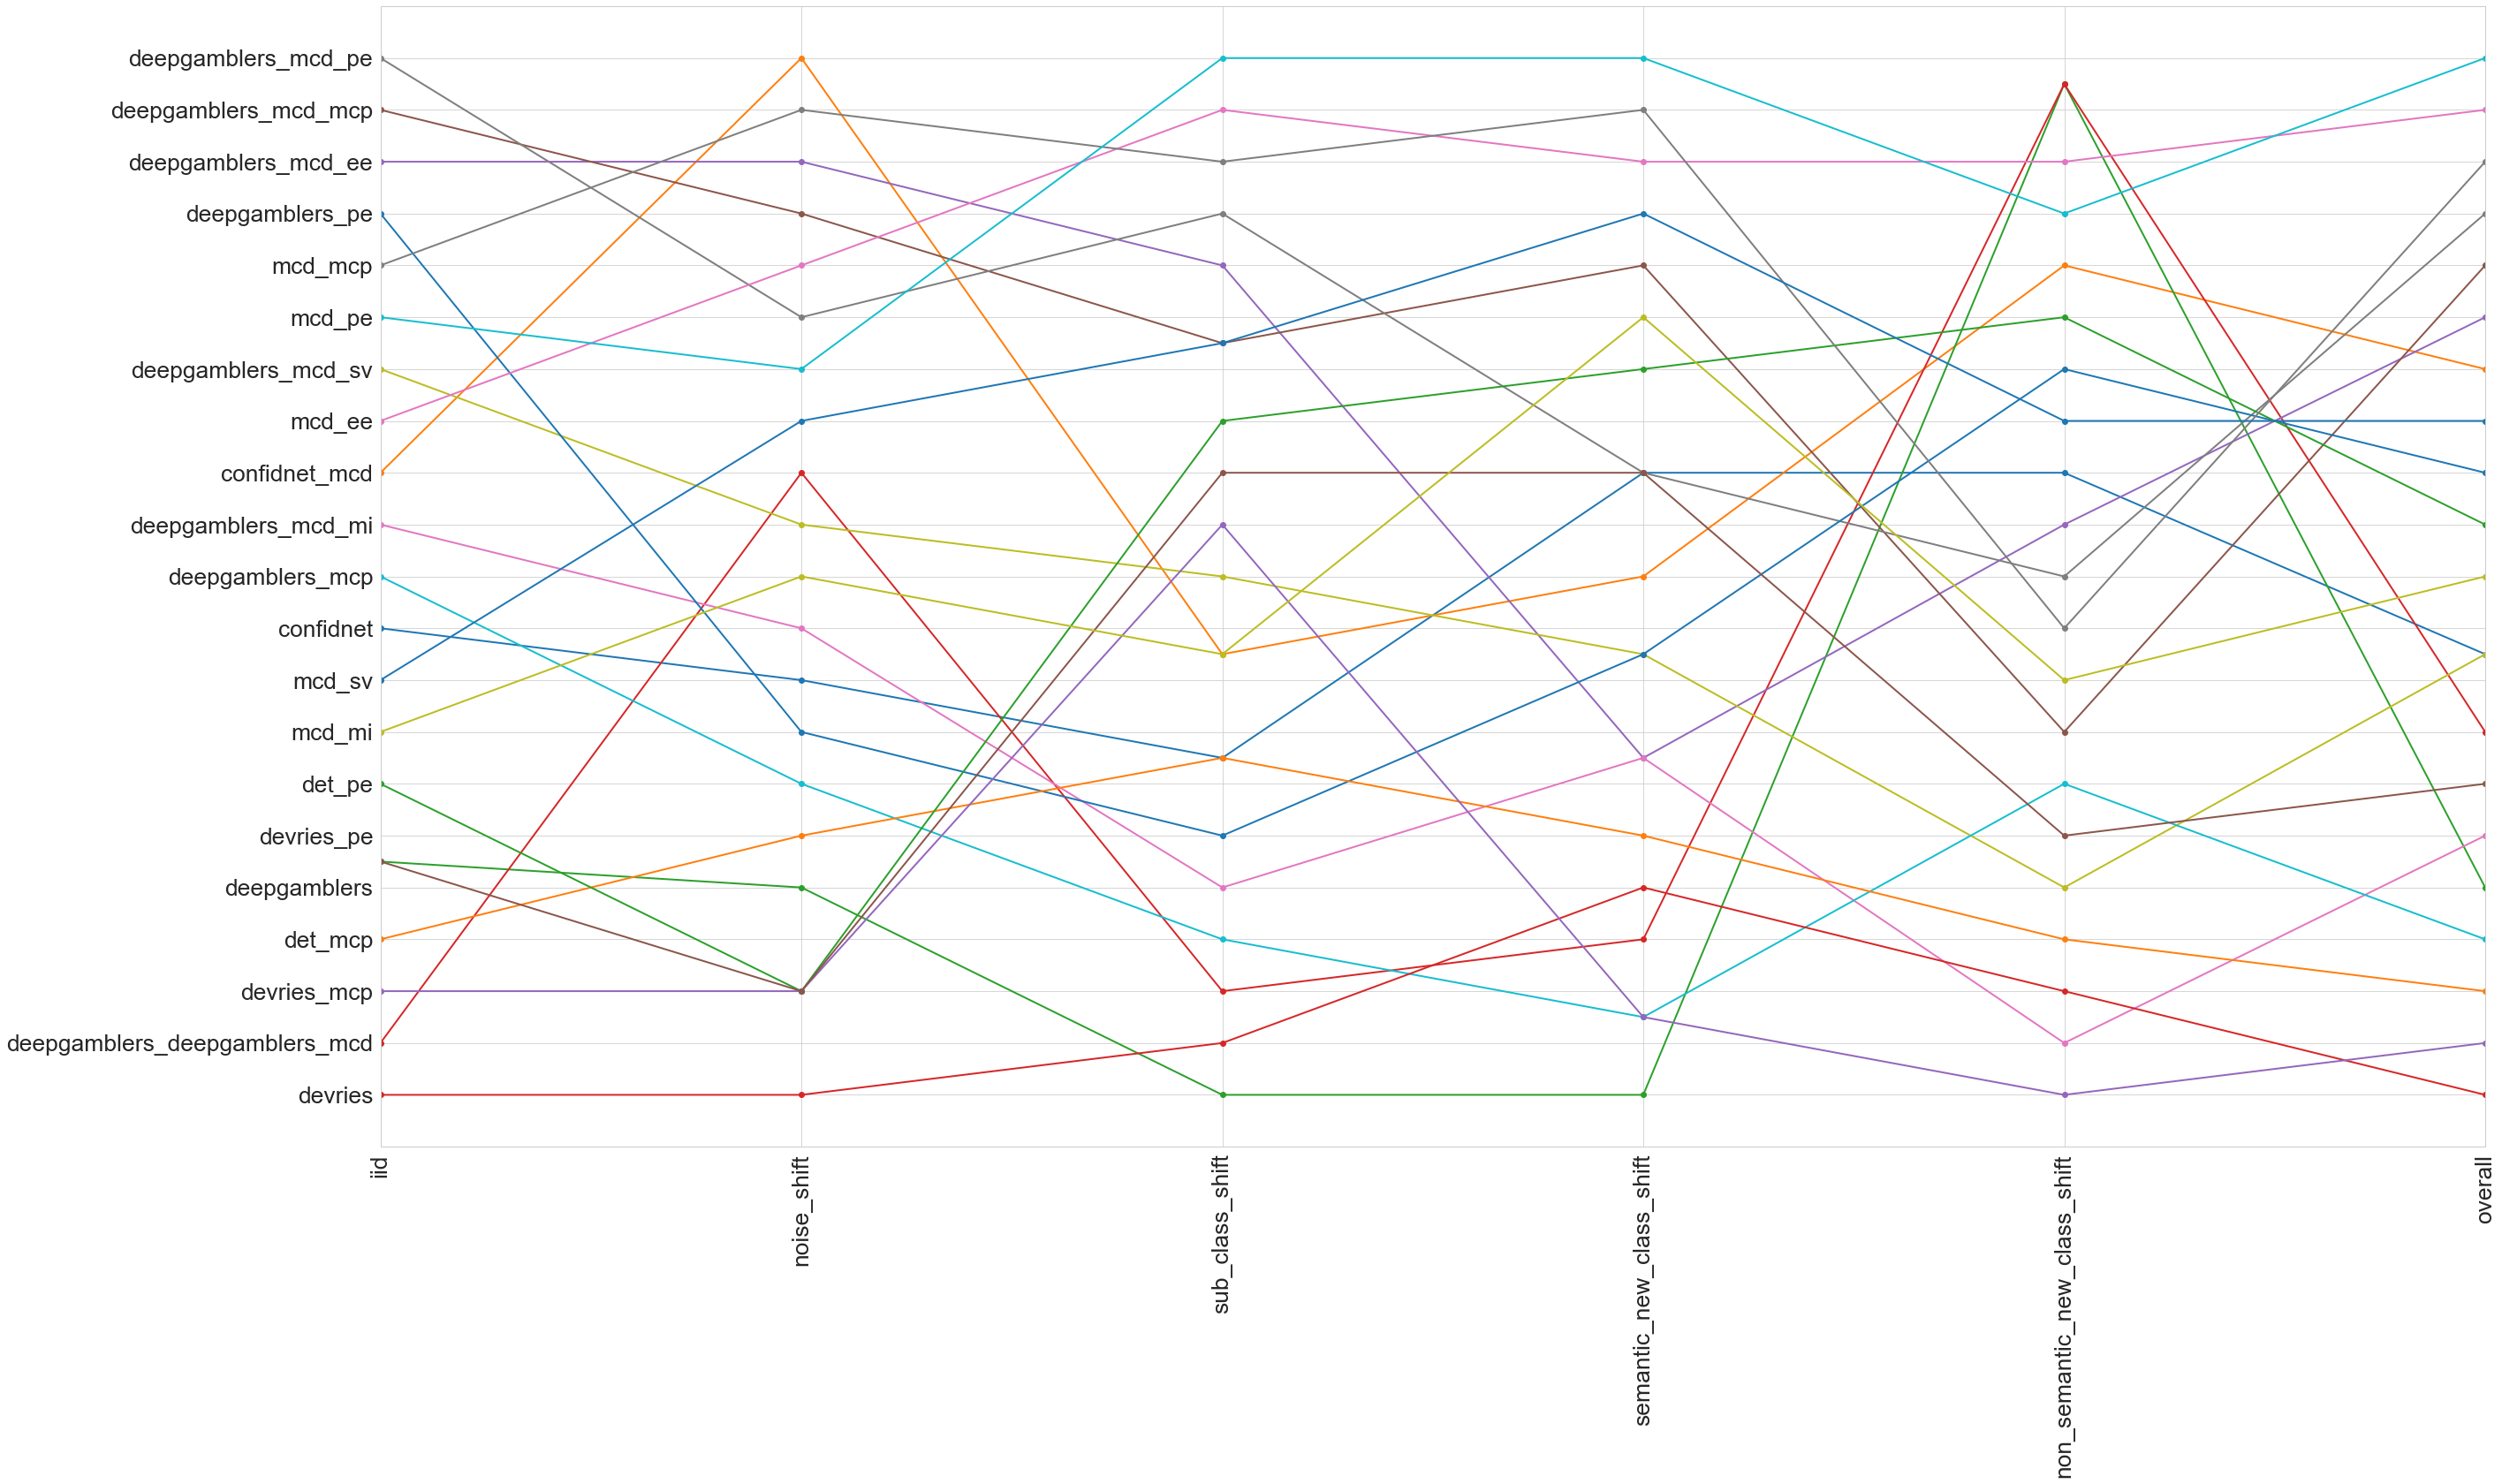

In [67]:
# SUM RANKING PLOTS

select_columns = [c for c in rank_df.columns ]
iid_columns = [c for c in select_columns if "iid" in c]
print("IID", iid_columns)
in_class_columns = [c for c in select_columns if "in_class" in c]
print("SUB CLASS", in_class_columns)
new_class_columns = [c for c in select_columns if ("new_class" in c and "proposed" in c)]
sem_new_class_columns = [c for c in new_class_columns if ("cifar10_" in c and "cifar100_" in c)]
print("SEMANTIC NEW CLASS", sem_new_class_columns)
nonsem_new_class_columns = [c for c in new_class_columns if c not in sem_new_class_columns]
print("NON-SEMANTIC NEW CLASS", nonsem_new_class_columns)
noise_columns = [c for c in select_columns if "noise" in c]
print("NOISE", noise_columns)
sum_rank_df = rank_df[["confid"]]
sum_rank_df["iid"] = rank_df[iid_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["noise_shift"] = rank_df[noise_columns].sum(axis=1, numeric_only=True, skipna=False)
if len(in_class_columns) > 0:
    sum_rank_df["sub_class_shift"] = rank_df[in_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["semantic_new_class_shift"] = rank_df[sem_new_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df["non_semantic_new_class_shift"] = rank_df[nonsem_new_class_columns].sum(axis=1, numeric_only=True, skipna=False)
sum_rank_df = sum_rank_df.rank(na_option="keep", numeric_only=True, ascending=True)
sum_rank_df["confid"] = rank_df.confid
sum_rank_df["overall"] = sum_rank_df.sum(axis=1, numeric_only=True, skipna=False).rank(na_option="keep", ascending=True)

sum_rank_df["iid"] = sum_rank_df.apply(lambda row: row["iid"] + 0.5 if row["confid"] == "confidnet_mcd" else row["iid"], axis=1)
sum_rank_df["iid"] = sum_rank_df.apply(lambda row: row["iid"] - 0.5 if row["confid"] == "deepgamblers_mcd_mi" else row["iid"], axis=1)

scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.30)
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(4*scale, 2*scale * 1.2))
# todo ! supercifar has to be a part of cifar100 exp. check also weird observation regarding val_tuning

show_columns = ["iid", "noise_shift", "sub_class_shift", "semantic_new_class_shift", "non_semantic_new_class_shift", "overall"]
cols = show_columns#[c for c in sum_rank_df.columns if c.startswith("sum")]
numeric_exp_df = sum_rank_df[cols]
# todo DROPNAN?
confids_list = sum_rank_df.confid.tolist()
x = range(len(numeric_exp_df.columns))
for ix in range(len(numeric_exp_df)):
    y = numeric_exp_df.iloc[ix].values
    axs.plot(x, y, linewidth=2, marker=".", ms=12)
axs.set_yticks(range(1, len(numeric_exp_df) + 1))
axs.set_yticklabels(sum_rank_df.sort_values(by=numeric_exp_df.columns[0]).confid.tolist())
axs.set_xticks(x)
axs.set_xticklabels([c for c in numeric_exp_df.columns], rotation = 90)
axs.set_xlim(0, len(numeric_exp_df.columns) - 1)

plt.tight_layout()
plt.show()

['animals_val_tuning', 'animals_iid_study', 'animals_in_class_study_wilds_animals_ood_test'] Index(['study', 'confid', 'run', 'aurc'], dtype='object')
['animals_val_tuning', 'animals_iid_study', 'animals_in_class_study_wilds_animals_ood_test'] Index(['study', 'confid', 'run', 'accuracy'], dtype='object')
['animals_val_tuning', 'animals_iid_study', 'animals_in_class_study_wilds_animals_ood_test'] Index(['study', 'confid', 'run', 'failauc'], dtype='object')


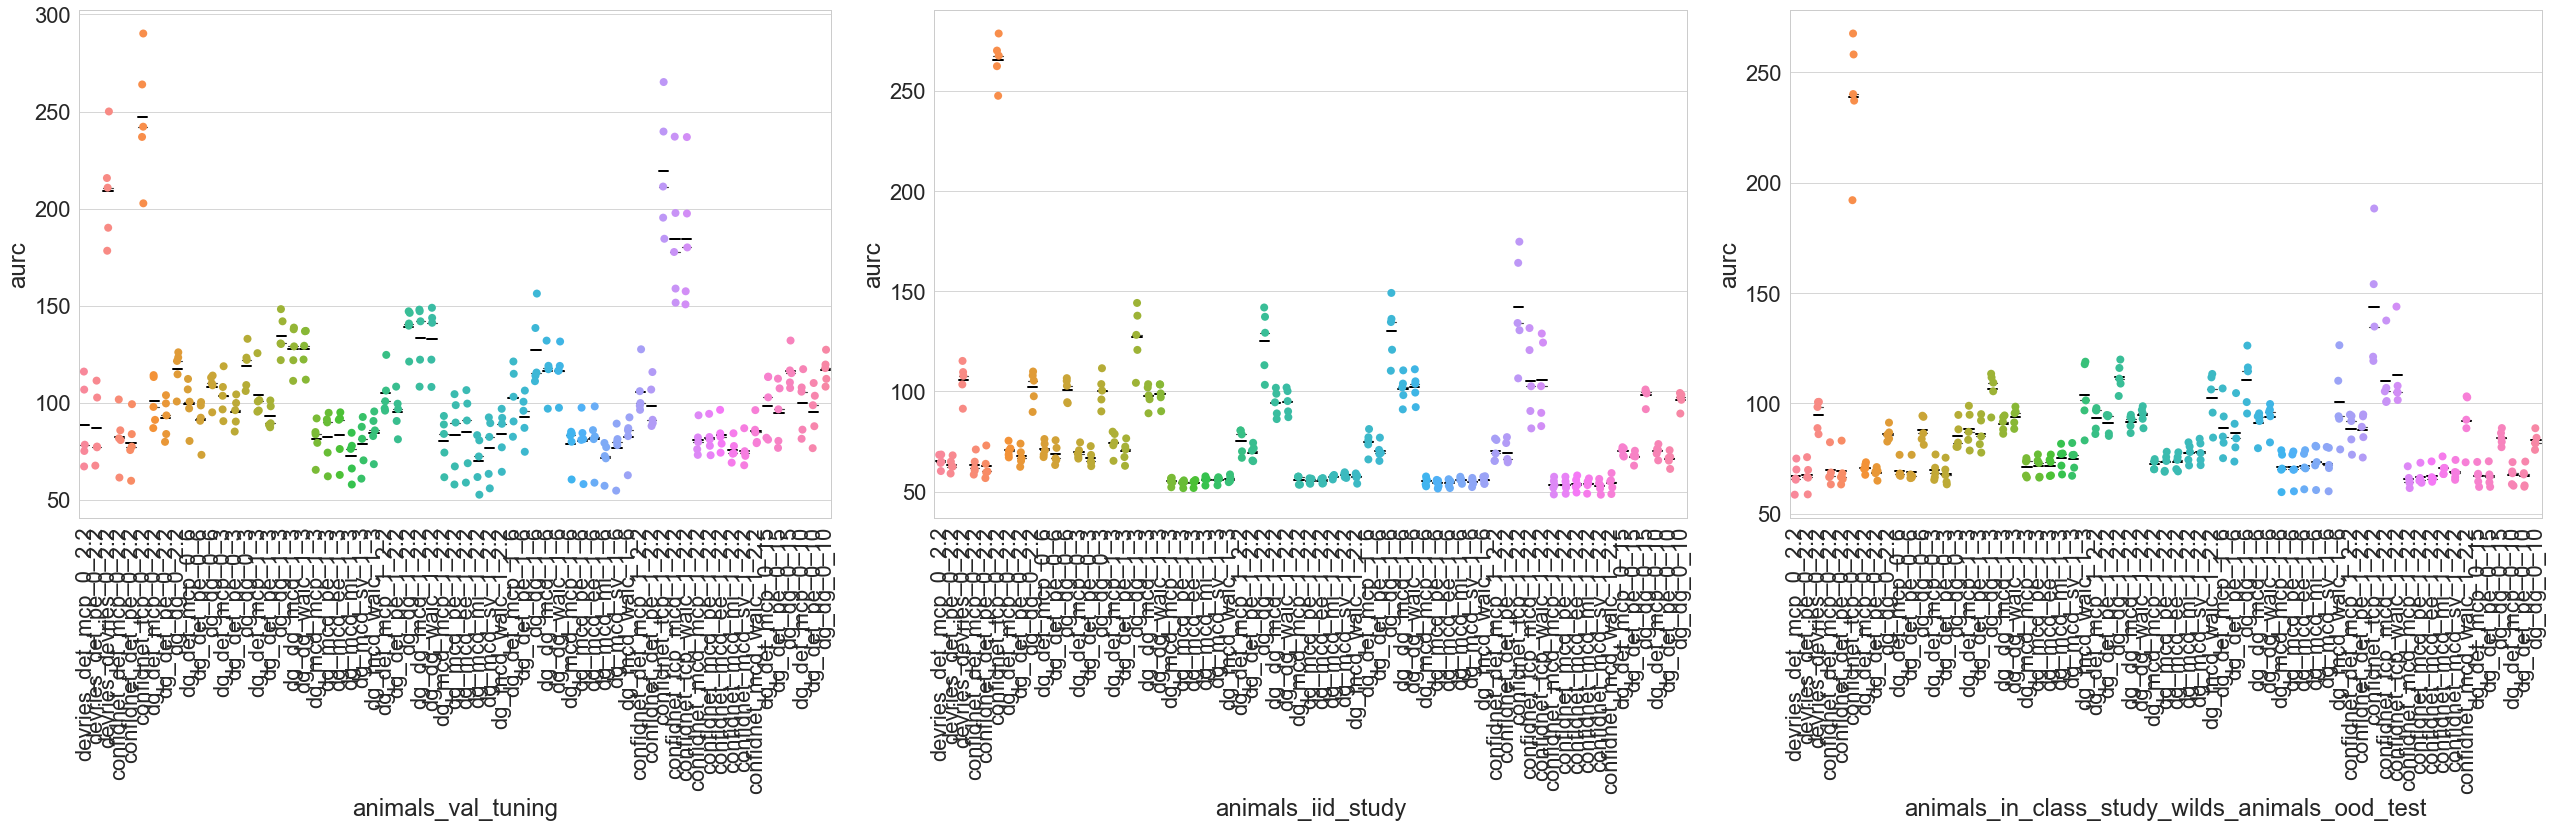

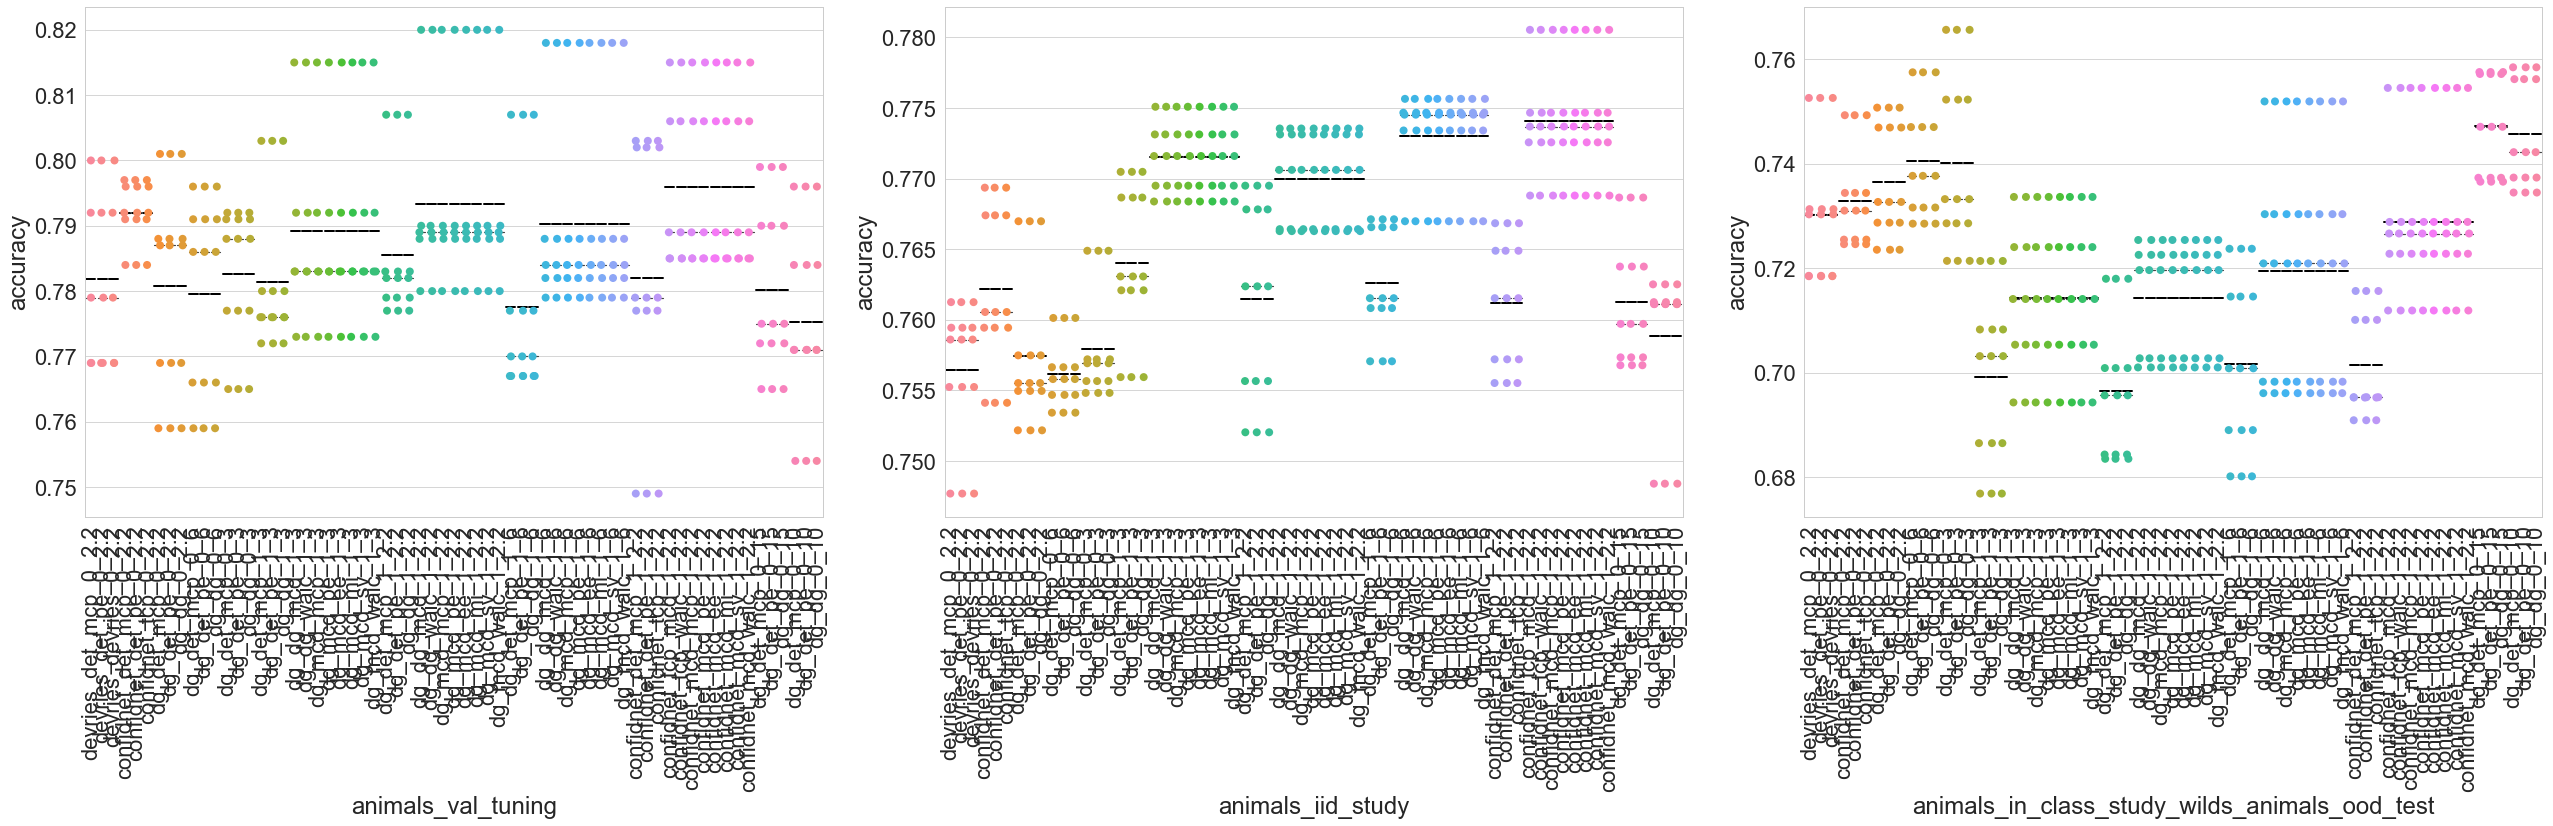

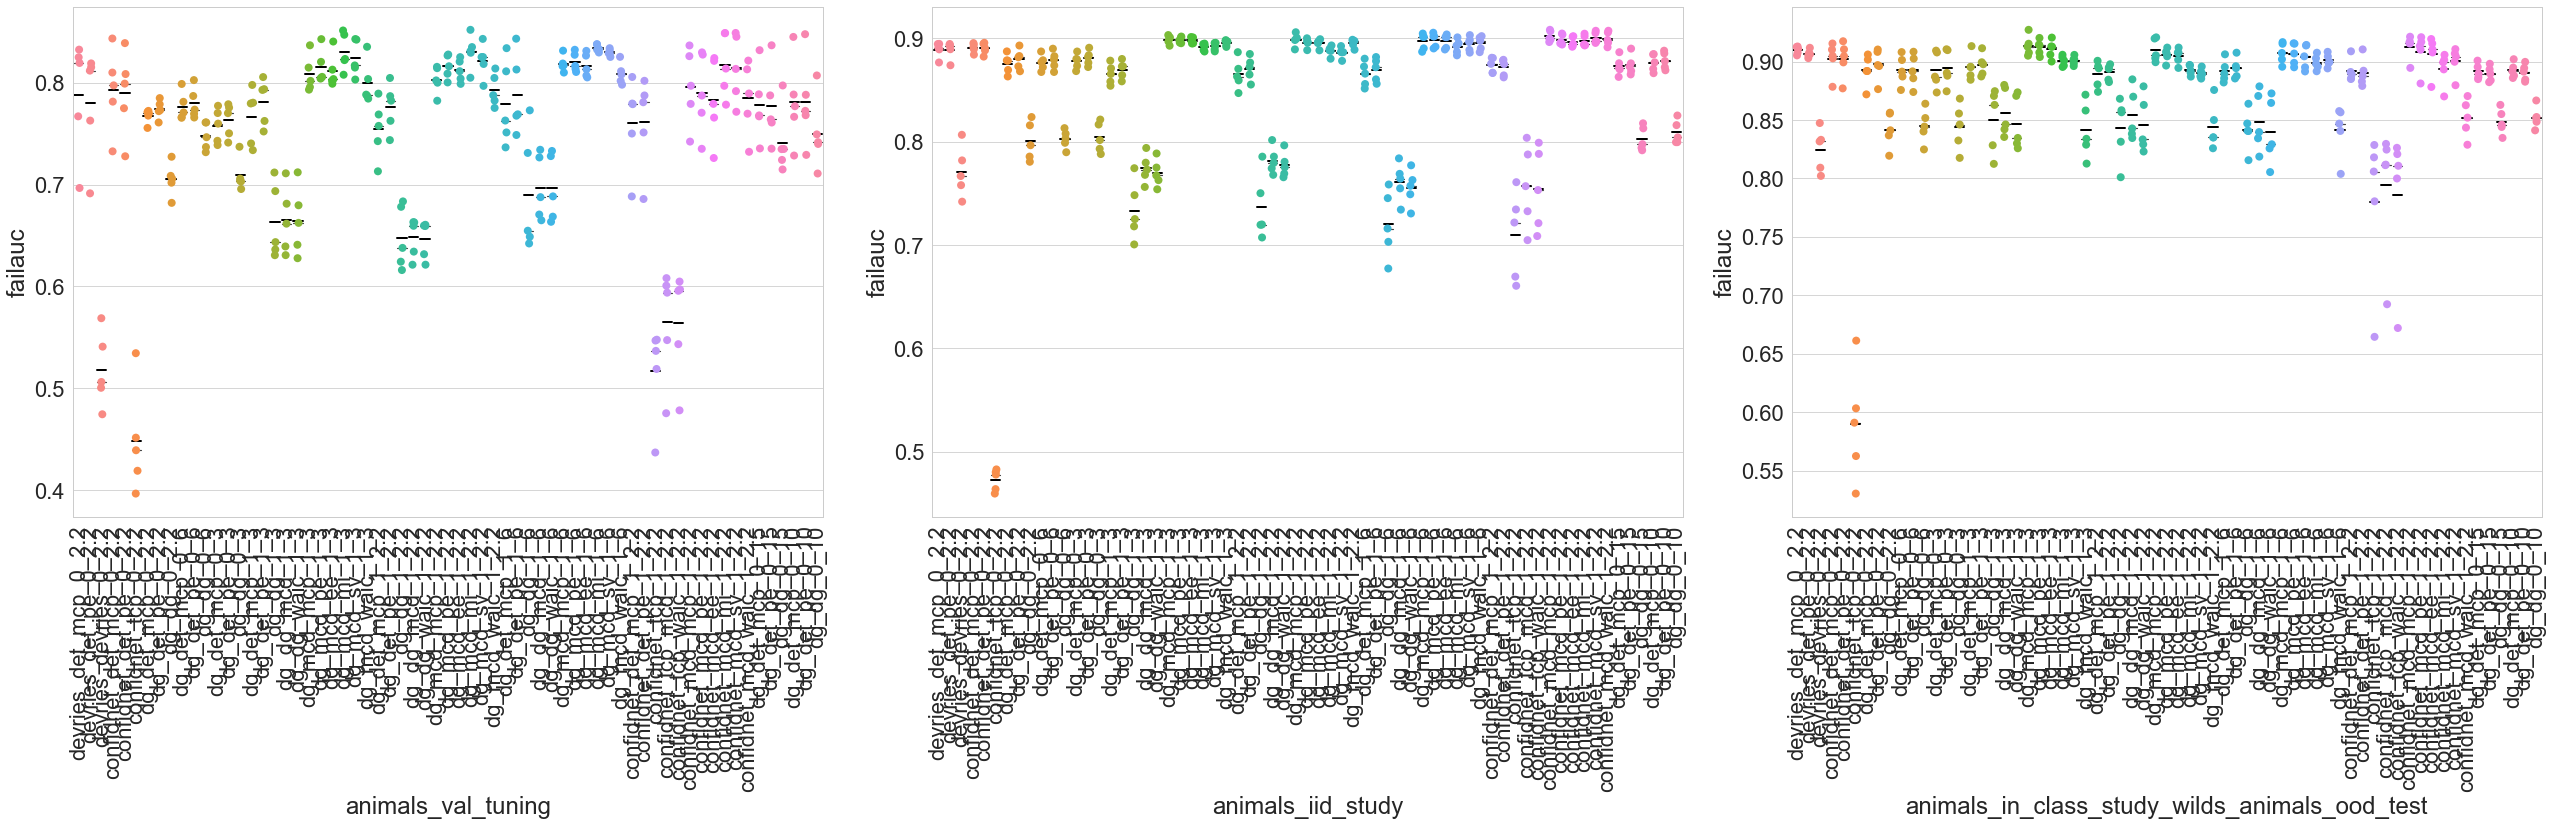

In [61]:
# OVERVOEW PLOTS

metrics = ["aurc", "accuracy", "failauc"]
plot_exps = ["animals"] # exp_names
cross_mode = False
scale = 10
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=scale * 0.25)
dims = ["confid"]

for metric in metrics:
    if not cross_mode:
        for exp in plot_exps:
            plot_data = df[df.study.str.startswith(exp + "_")][["study", "confid", "run", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
            studies = plot_data.study.unique().tolist()
            print(studies, plot_data.columns)
            f, axs = plt.subplots(nrows=len(dims), ncols=len(studies), figsize=(len(studies)*scale*1.2, len(dims)*scale * 1.2))
            for xix, dim in enumerate(dims):
                for yix, study in enumerate(studies):
                    y = metric
                    sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], s = scale*0.8)
                    sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == study], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                    axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                    axs[yix].set_xlabel(study)
                    # if "iid" in study and metric == "aurc":
                    #     axs[xix, yix].set_ylim(4, 8)
                    # if "iid" in study and metric == "failauc":
                    #     axs[xix, yix].set_ylim(0.90, 0.96)
            plt.tight_layout()
            plt.savefig("/Users/Paul/research/files/analysis/paper_plots/paper_{}_{}.png".format(exp, metric))
    else:
        # plot_data = df[df.study.str.startswith(exp)][["study", "confid", "run", "rew", metric]] # & (data["ne"].str.contains("250")) & (data["ap"]==False)]
        plot_data = df[df.study.str.contains("iid_study")][["study", "confid", "run", "rew", metric]]
        print(studies, plot_data.columns)
        f, axs = plt.subplots(nrows=len(dims), ncols=len(exp_names), figsize=(len(exp_names)*scale, len(dims)*scale * 1.2))
        for xix, dim in enumerate(dims):
            for yix, exp in enumerate(exp_names):
                y = metric
                sns.stripplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], s = scale*0.8)
                sns.boxplot(ax=axs[yix], x=dim, y=metric, data=plot_data[plot_data.study == "{}_iid_study".format(exp)], saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
                axs[yix].set_xticklabels(axs[yix].get_xticklabels(),rotation=90)
                axs[yix].set_xlabel(exp)
                # if "iid" in study and metric == "aurc":
                #     axs[xix, yix].set_ylim(4, 8)
                # if "iid" in study and metric == "failauc":
                #     axs[xix, yix].set_ylim(0.90, 0.96)
        plt.tight_layout()
        plt.savefig("/Users/Paul/research/files/analysis/paper_plots/paper_iid_{}.png".format(metric))






In [ ]:
df[(df.study == "iid_study") & (df.dropout == "1")]

In [ ]:
import numpy as np
np.std([0.95000, 0.94633, 1])
np.std([95.000, 94.633], ddof=1)